In [2]:
# Imports

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

## Problem 1

In [34]:
# Function definitions for numerical methods

def euler(deriv, state, step):
    """Euler integration method."""
    state = np.array(state)
    return state + step * deriv(state)

def runge_kutta(deriv, state, step):
    """Runge-Kutta 4th order integration method."""
    state = np.array(state)
    k1 = step * deriv(state)
    k2 = step * deriv(state + 0.5 * k1)
    k3 = step * deriv(state + 0.5 * k2)
    k4 = step * deriv(state + k3)
    return state + (k1 + 2*k2 + 2*k3 + k4) / 6

def leapfrog(deriv, state, step):
    """Leapfrog integration method, specifically for conservative systems."""
    pos, vel = state[:2], state[2:] # TRQ: you have explicitly coded for a 2-DOF system.
    vel += step * deriv(np.concatenate((pos, vel)))
    pos += step * vel
    return np.concatenate((pos, vel))

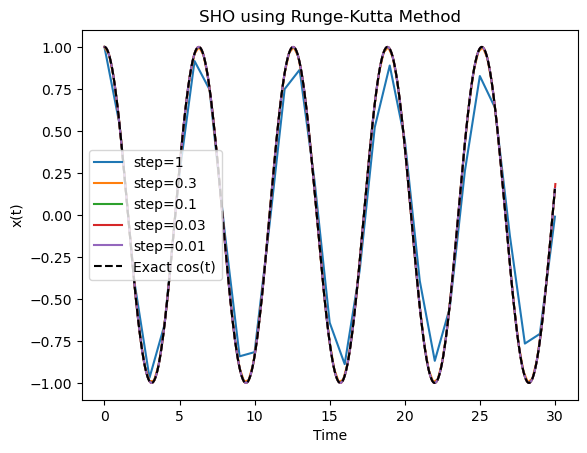

In [35]:
# Differential equations for Problem 1 (Simple Harmonic Oscillator)

def deriv_sho(state):
    x, v = state
    return np.array([v, -x])

# Problem 1: Solve using different methods and step sizes

step_sizes = [1, 0.3, 0.1, 0.03, 0.01]
t_end = 30
initial_state = [1., 0.] # TRQ: changed from ints to floats to avoid error in leapfrog

for step in step_sizes:
    t = np.arange(0, t_end + step, step)
    state = np.array(initial_state)
    results = [state[0]]
    for _ in t[:-1]:
        state = runge_kutta(deriv_sho, state, step)
        results.append(state[0])
    plt.plot(t, results, label=f'step={step}')

plt.plot(t, np.cos(t), 'k--', label='Exact cos(t)')
plt.title('SHO using Runge-Kutta Method')
plt.xlabel('Time')
plt.ylabel('x(t)')
plt.legend()
plt.show()


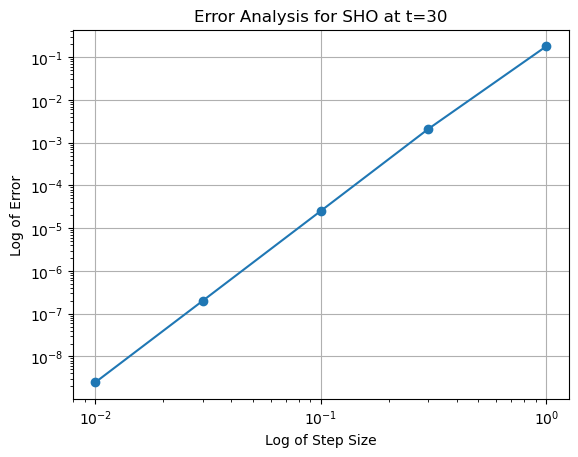

In [36]:
# Error analysis

errors = []
for step in step_sizes:
    # TRQ: get a step that will give take the integration to exactly the end of the interval
    step_exact = t_end/(int(t_end/step)-1 )
    step = step_exact
    t = np.arange(0, t_end + step, step)
    state = np.array(initial_state)
    for _ in t[:-1]:
        state = runge_kutta(deriv_sho, state, step)
    errors.append(abs(state[0] - np.cos(t_end)))

plt.figure()
plt.loglog(step_sizes, errors, 'o-')
plt.title('Error Analysis for SHO at t=30')
plt.xlabel('Log of Step Size')
plt.ylabel('Log of Error')
plt.grid(True)
plt.show()

In [37]:
# 2a (euler)

# reset state to initial state
state = initial_state

# point to evaluate the state at
index = t[0]

# find the numerical integration value over the integration range `t` via Euler's method
while index <= t[1]:
    
    new_state = euler(deriv_sho, state, step) # TRQ: I had to correct this line
    state = new_state
    index += step

print ("Numerical result via Euler's method with a", step, "step size:", state[0])

Numerical result via Euler's method with a 0.010003334444814937 step size: 0.9998999332999852


In [38]:
# 2a (runge-kutta)

# reset state to initial state
state = initial_state

# point to evaluate the state at
index = t[0]

# find the numerical integration value over the integration range `t` via Runge-Kutta
while index <= t[1]:
    
    new_state = runge_kutta(deriv_sho, state, step) # TRQ: I had to correct this line
    state = new_state
    index += step

print ("Numerical result via Runge-kutta with a", step, "step size:", state[0])

Numerical result via Runge-kutta with a 0.010003334444814937 step size: 0.9997998732754637


In [39]:
# 2a (leapfrog)

# reset state to initial state
state = np.array(initial_state)

# point to evaluate the state at
index = t[0]

# initial v_1/2 value
v = state[1] + step/2 * deriv_sho(state)[1]

# udate initial state with v_1/2
state[1] = v

while index <= t[1]:
    
    new_state = leapfrog(deriv_sho, state, step)
    
    state = new_state
    index += step

print ("Numerical result via Leapfrog with a", step, "step size:", state[0])

ValueError: operands could not be broadcast together with shapes (0,) (2,) (0,) 

In [40]:
#2b

def test_step(method, deriv, initial_state, interval, step):
    """
    test_step is a function created to perform numerical integration for various step sizes.
    - method: numerical integration function that takes in parameters of deriv, state, and step
    - deriv: function that evaluates the derivative of the given state
    - initial_state: list of numbers defining the state at which to start evaluation
    - interval: list containing the beginning and end points of the interval over which to do integration
    - step: rate at which integration is perfomed over the interval
    - retrun: numerical integration value defined by the above parameters
    """
    index = interval[0]
    state = initial_state

    while index <= interval[1]:
        new_state = method(deriv, state, step)
        state = new_state
        index += step

    return state

# range of step values to test
h = np.linspace(.001, 1, 100)

# lists of integration results for varying step values with different integration methods
e_result = np.array([]) # euler
rk_result = np.array([]) # runge-kutta
lf_result = np.array([]) # leapfrog

for j in h:
    e_result = np.append(e_result, test_step(euler, deriv_sho, initial_state, t, j)[0])
    rk_result = np.append(rk_result, test_step(runge_kutta, deriv_sho, initial_state, t, j)[0])
    lf_result = np.append(lf_result, test_step(leapfrog, deriv_sho, initial_state, t, j)[0])

# difference between numerical integration and the analytical result for varying step values and methods of integration
e_result = e_result - np.cos(30)
rk_result = rk_result - np.cos(30)
lf_result = lf_result - np.cos(30)

# plotting
plt.xlim(-3, -1)
plt.ylim(-10, 0)
plt.plot(np.log10(h), np.log10(np.absolute(e_result)), label='Euler')
plt.plot(np.log10(h), np.log10(np.absolute(rk_result)), label='Runge-Kutta')
plt.plot(np.log10(h), np.log10(np.absolute(lf_result)), label='Leapfrog')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('log10(step_size)')
plt.ylabel('log10(difference)')
plt.show()

ValueError: operands could not be broadcast together with shapes (0,) (2,) 

## Problem 3

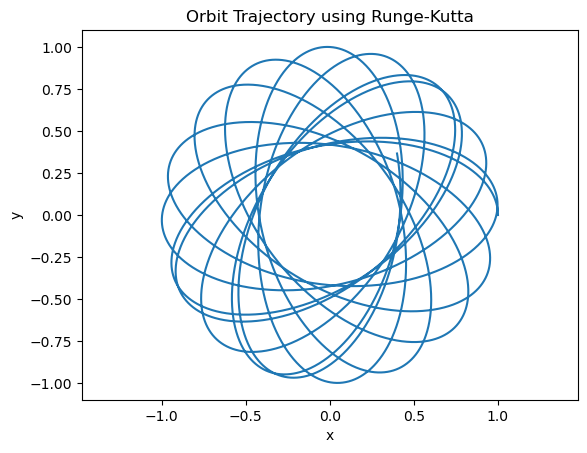

In [41]:
# Problem 2: Two-dimensional Orbit with Differential Equations

def deriv_orbit(state):
    x, y, vx, vy = state
    r3 = (x**2 + y**2 + 1)**1.5
    return np.array([vx, vy, -x/r3, -y/r3])

initial_state_orbit = [1, 0, 0, 0.3]
t_range = np.arange(0, 100, 0.01)

# Runge-Kutta integration for orbit
states = [initial_state_orbit]
for _ in t_range[:-1]:
    states.append(runge_kutta(deriv_orbit, states[-1], 0.01))

states = np.array(states)
plt.figure()
plt.plot(states[:, 0], states[:, 1])
plt.title('Orbit Trajectory using Runge-Kutta')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()

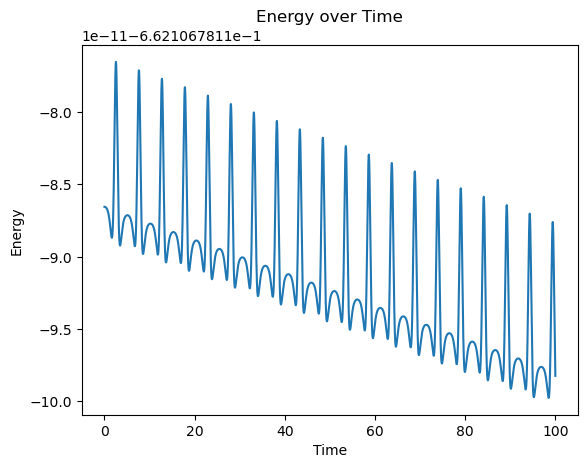

In [42]:
# Energy calculation and plotting

energy = 0.5 * (states[:, 2]**2 + states[:, 3]**2) - 1 / np.sqrt(states[:, 0]**2 + states[:, 1]**2 + 1)
plt.figure()
plt.plot(t_range, energy)
plt.title('Energy over Time')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.show()

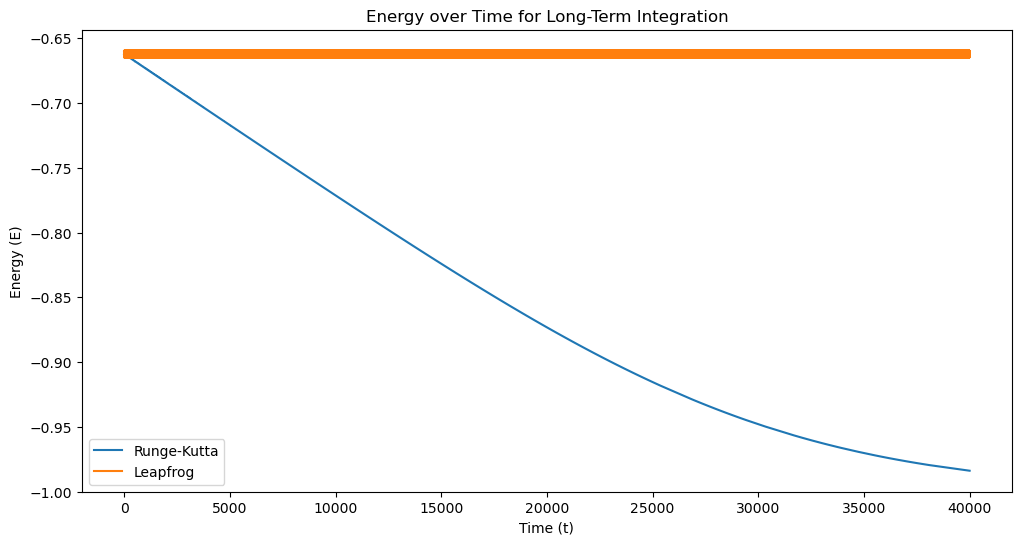

In [43]:
import time

# Initial conditions and parameters
initial_state_orbit = [1, 0, 0, 0.3]
t_start = 0
t_end = 40000
step = 0.4
t_range_long = np.arange(t_start, t_end + step, step)

# Integration with Runge-Kutta
start_time_rk = time.time()
states_rk = [initial_state_orbit]
for _ in t_range_long[:-1]:
    states_rk.append(runge_kutta(deriv_orbit, states_rk[-1], step))
end_time_rk = time.time()

# Integration with Leapfrog
def leapfrog(deriv, state, step):
    """Leapfrog integration method, specifically for conservative systems."""
    pos, vel = state[:2], state[2:]
    # Update velocities at half step
    vel_half_step = vel + 0.5 * step * deriv(state)[2:]
    # Update positions at full step
    pos_full_step = pos + step * vel_half_step
    # Complete the velocity update to full step
    vel_full_step = vel_half_step + 0.5 * step * deriv(np.concatenate((pos_full_step, vel_half_step)))[2:]
    return np.concatenate((pos_full_step, vel_full_step))

# Initial setup for integration with Leapfrog
start_time_lf = time.time()
states_lf = [initial_state_orbit]
pos, vel = states_lf[-1][:2], states_lf[-1][2:]
# Update velocities halfway before the loop
vel += 0.5 * step * deriv_orbit(np.concatenate((pos, vel)))[2:]
states_lf[-1] = np.concatenate((pos, vel))

# Perform the Leapfrog integration
for _ in t_range_long[:-1]:
    new_state = leapfrog(deriv_orbit, states_lf[-1], step)
    states_lf.append(new_state)


states_rk = np.array(states_rk)
states_lf = np.array(states_lf)
end_time_lf = time.time()

# Calculating the energy for each method
energy_rk = 0.5 * (states_rk[:, 2]**2 + states_rk[:, 3]**2) - 1 / np.sqrt(states_rk[:, 0]**2 + states_rk[:, 1]**2 + 1)
energy_lf = 0.5 * (states_lf[:, 2]**2 + states_lf[:, 3]**2) - 1 / np.sqrt(states_lf[:, 0]**2 + states_lf[:, 1]**2 + 1)

# Plotting the energy over time
plt.figure(figsize=(12, 6))
plt.plot(t_range_long, energy_rk, label='Runge-Kutta')
plt.plot(t_range_long, energy_lf, label='Leapfrog')
plt.title('Energy over Time for Long-Term Integration')
plt.xlabel('Time (t)')
plt.ylabel('Energy (E)')
plt.legend()
plt.show()




In [44]:
# Performance analysis
time_rk = end_time_rk - start_time_rk
time_lf = end_time_lf - start_time_lf
print(f"Runge-Kutta computation time: {time_rk:.2f} seconds")
print(f"Leapfrog computation time: {time_lf:.2f} seconds")

Runge-Kutta computation time: 4.30 seconds
Leapfrog computation time: 2.88 seconds
